# Traffic Crash Data Analysis with Pandas, Python, Google Colab, and Matplotlib

This repository provides a step-by-step tutorial on performing data analysis using a real-world dataset of traffic crashes. We'll leverage the power of Python's pandas library for data manipulation, Matplotlib for visualization, and Google Colab for an interactive coding environment.

## Project Overview

This tutorial walks you through the process of:
- Loading a large CSV dataset into a pandas DataFrame.
- Initial data inspection and handling common issues like mixed data types.
- Extracting meaningful information, such as crash counts by year.
- Visualizing data trends using Matplotlib to gain insights.
- Identifying missing values across the dataset.

## Tools Used

- **Python**: The core programming language.
- **Pandas**: A powerful data manipulation and analysis library.
- **Matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations.
- **Google Colab**: A cloud-based Jupyter notebook environment that requires no setup to use and offers free access to computing resources.

## Dataset

The data used in this tutorial is the "Traffic Crashes - Crashes" dataset, which is publicly available. You can download the latest version of this dataset from the City of Chicago's data portal:

[Download Traffic Crashes - Crashes Dataset](https://data.cityofchicago.org/d/85ca-t3if)

### How to get the data:
1. Visit the link above.
2. Look for the 'Export' or 'Download' options on the dataset page.
3. Download the data in CSV format.
4. If you're using Google Colab, upload the `.csv` file to your Google Drive and ensure you mount your Drive in Colab to access it (as demonstrated in the code).

## How to Use This Tutorial

1.  **Clone this repository** to your local machine or open it directly in Google Colab.
2.  **Download the dataset** as instructed above and place it where your Colab notebook can access it (e.g., your Google Drive).
3.  **Follow the code cells sequentially**: Each code cell is designed to build upon the previous one, guiding you through the data analysis process.
4.  **Experiment**: Feel free to modify the code, try different analyses, and explore other aspects of the dataset!

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Traffic_Crashes.csv', low_memory=False)

In [23]:
df = df.drop(['CRASH_DATE_EST_I'], axis=1)

In [24]:
# Convert the 'CRASH_DATE' column to datetime objects if it's not already
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

# Extract the year from the 'CRASH_DATE' column
df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year

# Group by year and count the crashes
crashes_by_year = df.groupby('CRASH_YEAR')['CRASH_YEAR'].count()

# Add the alias (new name) to the resulting Series
crashes_by_year.name = 'Total Crashes'

# Display the results
print(crashes_by_year.map('{:,}'.format))

CRASH_YEAR
2013          2
2014          6
2015      9,831
2016     44,297
2017     83,786
2018    118,951
2019    117,764
2020     92,095
2021    108,766
2022    108,411
2023    110,753
2024    112,052
2025    102,030
Name: Total Crashes, dtype: object


In [25]:
import matplotlib.pyplot as plt

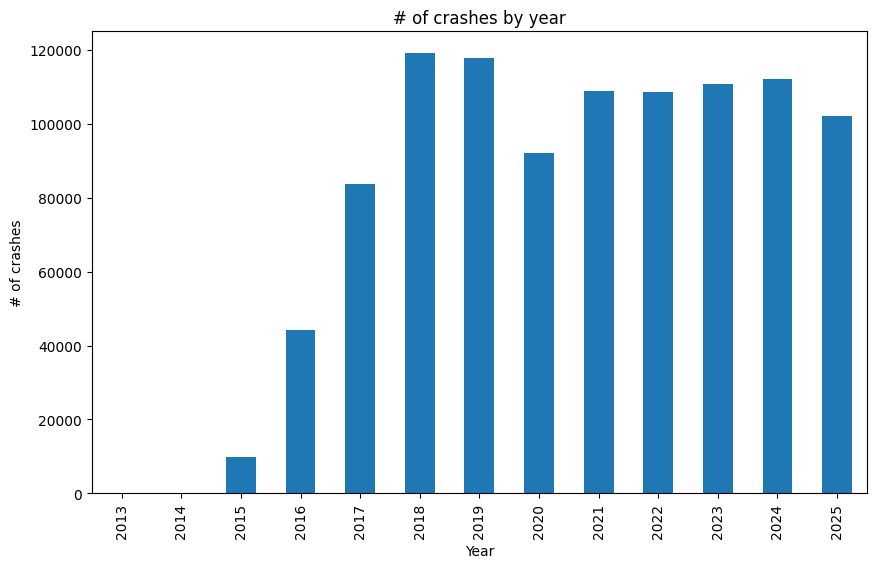

In [26]:
crashes_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('# of crashes by year')
plt.xlabel('Year')
plt.ylabel('# of crashes')
plt.show()

In [38]:
# Group by year and weather condition, then count
crashes_by_year_weather = df.groupby(['CRASH_YEAR', 'WEATHER_CONDITION'])['CRASH_YEAR'].count()

print(crashes_by_year_weather)

CRASH_YEAR  WEATHER_CONDITION     
2013        CLEAR                        2
2014        CLEAR                        3
            RAIN                         2
            UNKNOWN                      1
2015        CLEAR                     7474
                                      ... 
2025        RAIN                      6190
            SEVERE CROSS WIND GATE      11
            SLEET/HAIL                 108
            SNOW                      2916
            UNKNOWN                   8030
Name: CRASH_YEAR, Length: 122, dtype: int64


In [32]:
# Notice the output difference between print() statement above and statement below. Essentially they both print but a little bit differently.
crashes_by_year_weather

CRASH_YEAR  WEATHER_CONDITION     
2013        CLEAR                        2
2014        CLEAR                        3
            RAIN                         2
            UNKNOWN                      1
2015        CLEAR                     7474
                                      ... 
2025        RAIN                      6190
            SEVERE CROSS WIND GATE      11
            SLEET/HAIL                 108
            SNOW                      2916
            UNKNOWN                   8030
Name: CRASH_YEAR, Length: 122, dtype: int64

In [37]:
# Similar to SQL's IS NULL, this statement can find whether the column has any null values. Note that NaN (Not a Number) is also a null value but is treated differently.
df['STREET_DIRECTION'].isnull().sum()

np.int64(4)

In [35]:
# Check for null values in all columns
null_counts = df.isnull().sum()

# Display columns with null values and their counts
columns_with_nulls = null_counts[null_counts > 0]

if not columns_with_nulls.empty:
    print("Columns with null values:")
    print(columns_with_nulls)
else:
    print("No columns have null values.")

Columns with null values:
LANE_CNT                          809712
REPORT_TYPE                        33364
INTERSECTION_RELATED_I            776918
NOT_RIGHT_OF_WAY_I                963457
HIT_AND_RUN_I                     692193
STREET_DIRECTION                       4
STREET_NAME                            1
BEAT_OF_OCCURRENCE                     5
PHOTOS_TAKEN_I                    994422
STATEMENTS_TAKEN_I                984763
DOORING_I                        1005501
WORK_ZONE_I                      1003258
WORK_ZONE_TYPE                   1004554
WORKERS_PRESENT_I                1007336
MOST_SEVERE_INJURY                  2197
INJURIES_TOTAL                      2183
INJURIES_FATAL                      2183
INJURIES_INCAPACITATING             2183
INJURIES_NON_INCAPACITATING         2183
INJURIES_REPORTED_NOT_EVIDENT       2183
INJURIES_NO_INDICATION              2183
INJURIES_UNKNOWN                    2183
LATITUDE                            7658
LONGITUDE                      